In [1]:
push!(LOAD_PATH, ".")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "."

In [2]:
using HDF5, FFTW, DSP
using FFTWtoolkit
using Plots
gr()
using LinearAlgebra
using WAV

┌ Info: Precompiling FFTWtoolkit [top-level]
└ @ Base loading.jl:1260


In [3]:
nome="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

In [4]:
datos=h5open(nome)

HDF5 data file: ../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5

In [5]:
names(datos)

7-element Array{String,1}:
 "CMPNeg"
 "CMPos"
 "CSDLindenberg"
 "CanalesSaturados"
 "Canalesrespuesta"
 "LFPTotal"
 "freq"

In [6]:
lfp=read(datos["LFPTotal"]);

In [7]:
buenos=read(datos["Canalesrespuesta"]);
freq=read(datos["freq"])
# si la freq esta en kHz, pasarla a Hz
if freq<100
    freq=freq*1000
end
nmax=size(lfp, 3)
tmax=(nmax-1)/freq
# Minima frecuencia detectable en Fourier
frmin=2/tmax
# maxima frecuencia detectable (Nyquist)
frmax=(freq-frmin)/2

3507.51807017344

In [8]:
y,x= collect(buenos[7,:])

2-element Array{Int64,1}:
 38
  6

In [9]:
exemplo=lfp[y,x,:];

In [10]:
plan=plan_fft(exemplo);

In [11]:
fexe=plan*exemplo;

In [12]:
nmax=size(lfp)[3]
rango=1:nmax
tmax=nmax/freq
rangotiempos=(rango.-1)./freq
rangofreqs=(rango.-1)./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[1001]

0.0

In [13]:
poder=map(abs2, fexe);

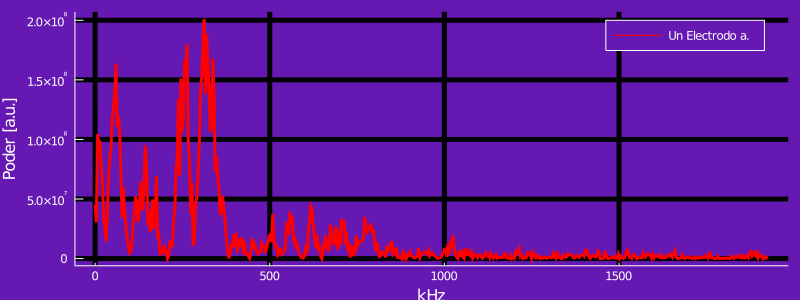

In [14]:
#figura=figure(figsize=(8,4))
#= ejemplo para aprender a usar Plots, veamos si si es más comodo que PyPlot
=#
#grid()
p=plot(rangofreqs[1:550], poder[1:550], 
    size=(800,300), xlabel= "kHz", ylabel="Poder [a.u.]", label="Un Electrodo a.",
    lw=3, c="red", background_color=RGB(0.4,0.1,0.7),
    grid=(:on, :black), gridlinewidth=5, gridalpha=1)


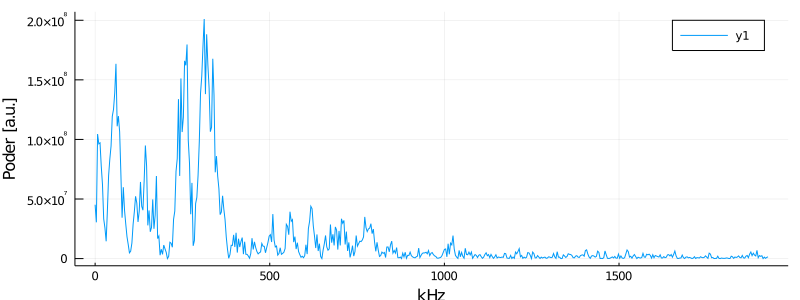

In [15]:
p=plot(size=(800,300), xlabel= "kHz", ylabel="Poder [a.u.]")
plot!(p,rangofreqs[1:550], poder[1:550])

In [16]:
ftotal=zeros(Complex, 64,64,nmax)
for j=1:64, k=1:64
    ftotal[j,k,:]=plan*lfp[j,k,:]
end

In [17]:
b=size(buenos)[1]
p=0
p=plot(size=(1000,900), xlabel= "kHz", ylabel="Poder [a.u.]")
rang=1:550
for el=1:5:b
    y,x= collect(buenos[el,:])
    ejemplo=map(abs2, ftotal[y,x,:])
    plot!(p, rangofreqs[rang], ejemplo[rang].+el*1e6,label="" , linecolor="black")
end
#display(p)

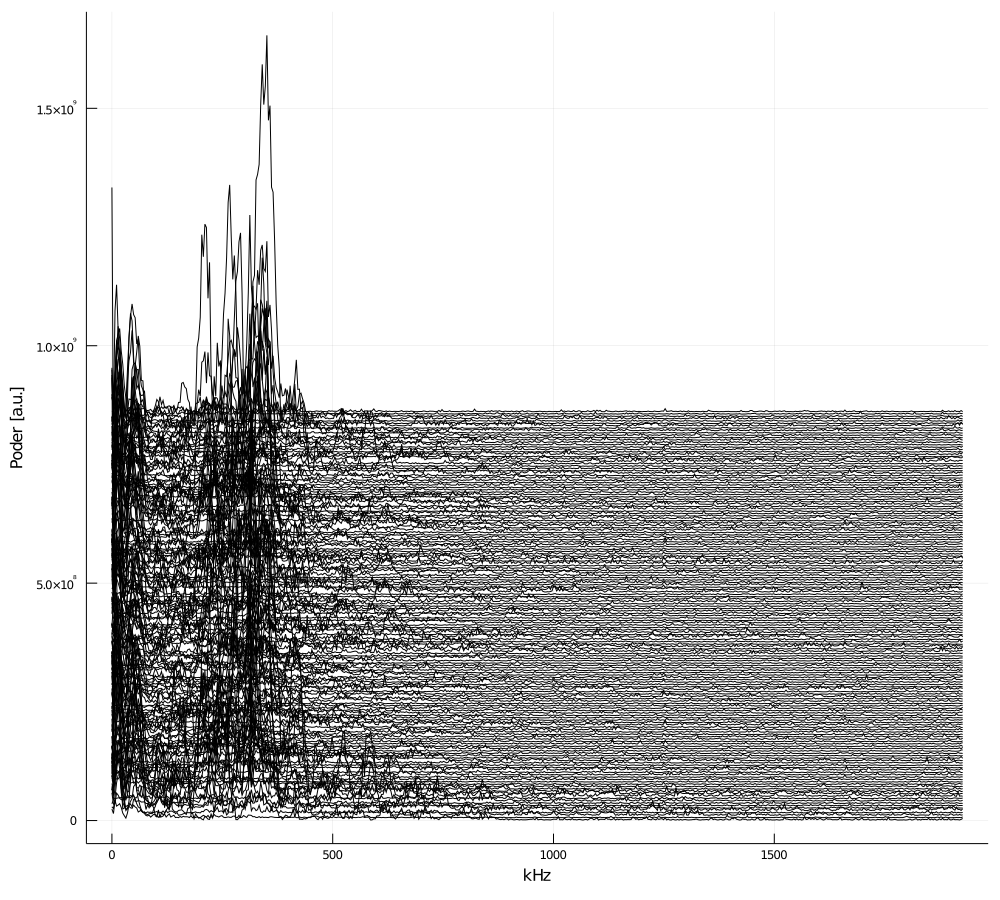

In [18]:
plot!(p, show=true)

In [19]:
pdg=periodogram(exemplo, fs=7022)

DSP.Periodograms.Periodogram{Float64,AbstractFFTs.Frequencies{Float64}}([3.2170125273226224, 4.2698053896507036, 14.84659659806796, 13.67249445649791, 13.95198563847375, 11.038530158998132, 9.107784099220522, 4.801676538578606, 3.8045512510813957, 2.0512966692056476  …  0.4429227712163133, 0.43930940804137897, 0.050775182046971845, 0.5733753753572144, 0.41215179285924874, 0.1868452988374459, 0.010454967129774959, 0.07496974866239468, 0.1445499242176613, 0.027034786261042307], [0.0, 3.4831349206349205, 6.966269841269841, 10.449404761904761, 13.932539682539682, 17.4156746031746, 20.898809523809522, 24.381944444444443, 27.865079365079364, 31.348214285714285  …  3479.651785714286, 3483.1349206349205, 3486.618055555555, 3490.1011904761904, 3493.584325396825, 3497.0674603174602, 3500.550595238095, 3504.03373015873, 3507.516865079365, 3511.0])

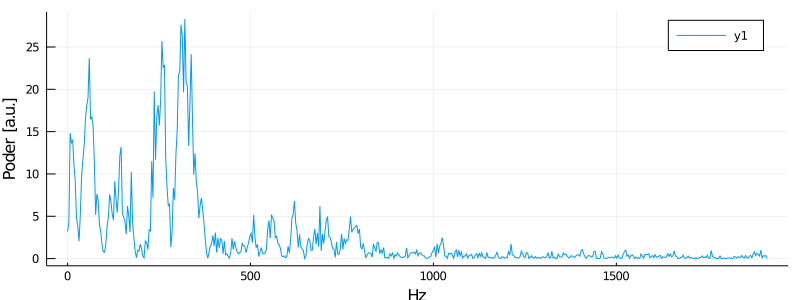

In [20]:
p=plot(size=(800,300), xlabel= "Hz", ylabel="Poder [a.u.]")
plot!(p,pdg.freq[1:550], pdg.power[1:550])

In [21]:
bla=separabandaneuro(exemplo)

BandaNeuro([0.0 0.0 … -28.994117726559182 -4.472325506586904; 0.0 0.0 … -30.263193237449226 -7.700830266846481; … ; 0.0 0.0 … -24.125173937419 1.4707619658831599; 0.0 0.0 … -26.919887890209253 -1.3041773741382148], Number[3.5, 7.0, 15.0, 35.0, 100.0, 250.0, 600.0], ["Delta", "Theta", "Alpha", "Beta", "Gamma", "spr", "uspr"])

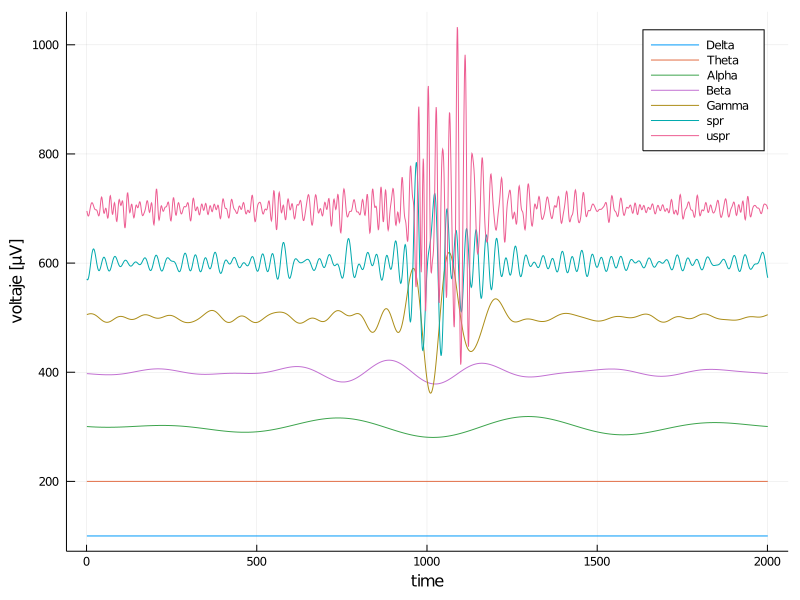

In [22]:
p=plot(size=(800,600), xlabel= "time", ylabel="voltaje [µV]")
for j=1:7
    plot!(p,bla.signal[:,j].+j*100, label=bla.names[j])
end
Plots.savefig("FiltraBandasNeuro01.png")
p

In [47]:
fs=round(Int, freq)

wavwrite([0], "lfpbandassonoro.wav", Fs=fs)

for fr in 3:7
    in_data = repeat(bla.signal[:,fr],10)
    WAV.wavplay(in_data, fs);
    wavappend(in_data, "lfpbandassonoro.wav")
end


InexactError: InexactError: Int32(2.539306258e9)

In [38]:
veamos=sacalasbandas(lfp)


In [40]:
?repeat

search: repeat RecipeData RecipesBase



```
repeat(A::AbstractArray, counts::Integer...)
```

Construct an array by repeating array `A` a given number of times in each dimension, specified by `counts`.

# Examples

```jldoctest
julia> repeat([1, 2, 3], 2)
6-element Array{Int64,1}:
 1
 2
 3
 1
 2
 3

julia> repeat([1, 2, 3], 2, 3)
6×3 Array{Int64,2}:
 1  1  1
 2  2  2
 3  3  3
 1  1  1
 2  2  2
 3  3  3
```

---

```
repeat(A::AbstractArray; inner=ntuple(x->1, ndims(A)), outer=ntuple(x->1, ndims(A)))
```

Construct an array by repeating the entries of `A`. The i-th element of `inner` specifies the number of times that the individual entries of the i-th dimension of `A` should be repeated. The i-th element of `outer` specifies the number of times that a slice along the i-th dimension of `A` should be repeated. If `inner` or `outer` are omitted, no repetition is performed.

# Examples

```jldoctest
julia> repeat(1:2, inner=2)
4-element Array{Int64,1}:
 1
 1
 2
 2

julia> repeat(1:2, outer=2)
4-element Array{Int64,1}:
 1
 2
 1
 2

julia> repeat([1 2; 3 4], inner=(2, 1), outer=(1, 3))
4×6 Array{Int64,2}:
 1  2  1  2  1  2
 1  2  1  2  1  2
 3  4  3  4  3  4
 3  4  3  4  3  4
```

---

```
repeat(s::AbstractString, r::Integer)
```

Repeat a string `r` times. This can be written as `s^r`.

See also: [`^`](@ref)

# Examples

```jldoctest
julia> repeat("ha", 3)
"hahaha"
```

---

```
repeat(c::AbstractChar, r::Integer) -> String
```

Repeat a character `r` times. This can equivalently be accomplished by calling [`c^r`](@ref ^).

# Examples

```jldoctest
julia> repeat('A', 3)
"AAA"
```


In [24]:
fieldnames(typeof(veamos))

(:delta, :theta, :alpha, :beta, :gamma, :spr, :uspr)

In [25]:
achu=zeros(nmax,7)
achu[:,1]=vec(sum(veamos.delta, dims=(1,2)))/4096
achu[:,2]=vec(sum(veamos.theta, dims=(1,2)))/4096
achu[:,3]=vec(sum(veamos.alpha, dims=(1,2)))/4096
achu[:,4]=vec(sum(veamos.beta, dims=(1,2)))/4096
achu[:,5]=vec(sum(veamos.gamma, dims=(1,2)))/4096
achu[:,6]=vec(sum(veamos.spr, dims=(1,2)))/4096
achu[:,7]=vec(sum(veamos.uspr, dims=(1,2)))/4096;


In [26]:
nomout=nome[1:end-3]*"_bandaslfp.h5"
h5open(nomout, "w") do file
    write(file,"delta",veamos.delta)
    write(file,"theta",veamos.theta)
    write(file,"alpha",veamos.alpha)
    write(file,"beta",veamos.beta)
    write(file,"gamma",veamos.gamma)
    write(file,"spr",veamos.spr)
    write(file, "uspr", veamos.spr)

end

In [27]:
arx1=h5open(nomout)

HDF5 data file: ../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1_bandaslfp.h5

In [28]:
names(arx1)

7-element Array{String,1}:
 "alpha"
 "beta"
 "delta"
 "gamma"
 "spr"
 "theta"
 "uspr"

In [29]:
alpha=read(arx1, "alpha")

64×64×2001 Array{Float64,3}:
[:, :, 1] =
 -1.58472     -0.27754      -0.0277433   …  -0.161342    -0.613128
 -0.267597    -0.798414      0.129383       -0.151373    -0.453177
 -0.247947     0.630774     -0.668044       -0.194945     1.45897
  0.448341    -0.293612     -0.438045       -0.0298295    0.493084
  0.0590778   -0.499122     -0.422581       -0.661165    -0.349484
 -0.442765    -0.191802     -0.56193     …  -0.332817    -0.48063
 -0.13693     -0.599021     -0.189057       -0.186205    -0.34891
 -0.0382404   -0.0601914     0.00761737     -0.0969964   -0.272922
 -0.029101    -0.186875     -0.0686228      -0.339745    -0.200452
 -0.103694    -0.60923      -0.0108539      -0.294683     0.131549
 -0.228477    -0.145009     -0.0520797   …  -0.30497     -0.0303003
 -0.120394     0.151601      0.117045       -0.230354    -0.235539
 -0.62138     -0.826607     -0.892647        0.208733    -0.443119
  ⋮                                      ⋱               
  0.209608     0.0432094  -650.4

In [30]:
p=plot(size=(800,200), xlabel= "Bandas", ylabel="Poder [a.u.]")
kys=["Delta", "Theta", "Alpha", "Beta", "Gamma", "spr", "uspr"]
bar!(p, pn.names, pn.powers )

UndefVarError: UndefVarError: pn not defined

In [31]:
ffu=fftwwin(exemplo, 20.0, fs=7022)
typeof(20.0)<:Integer

UndefVarError: UndefVarError: freq not defined

In [32]:
poweeer=abs2.(ffu.valores)

UndefVarError: UndefVarError: ffu not defined

In [33]:
plot(cmap="gnuplot")
heatmap!(ffu.tiemps, ffu.freqs,abs.(ffu.valores), map="coolwarm")
Plots.savefig("tuabuelaenvinagre01.png")

UndefVarError: UndefVarError: ffu not defined